# MA23M023_Lab-14_Part-B

# Question:

- Implement a neural network for m-samples, n-features as we discussed in class **(both FP and BP)** and for N layers in the hidden layer.

- Split the data (you can use the log. reg. data or any other one) and **train** your network with **70%** of the data. Use **15%** for **validation**  and **test** your network with the remaining **15% data.**


- Report the **evaluation metrics** for varying number of layers in the network.

- Plot the training **loss curves.**


In [1]:
import numpy as np     # importing different libaries
import math as m
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#  Load the data set 

In [2]:
data = pd.read_csv('Logistic_regression_ls.csv')    # reads the smarket csv file using pandas library.


# extracting the ground truth label column from the data set.
y = data[['label']]
y = y.values

# extracting the features from the adta set.
features = data[data.columns[0 : (len(data.columns)-1)]]
features = features.values

r, c = np.shape(features)

for i in range(c):     # normalizing the features.
    features[:,i] = (features[:,i] - features[:,i].mean())/features[:,i].std()
    

X = features

r, c = np.shape(X)
print(f'The shape of design matrix is: {r} {c}')

The shape of design matrix is: 500 2


#  Split the data set as 70% train , 15% test and 15% Validation set.


In [3]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

r1, c1 = np.shape(X_train)
print(f'The shape of x_train set is: {r1} {c1}')
    
r2, c2 = np.shape(y_train)
print(f'The shape of y_train set is: {r2} {c2}')

r3, c3 = np.shape(X_val)
print(f'The shape of x_validation set is: {r3} {c3}')

r4, c4 = np.shape(y_val)
print(f'The shape of y_validation set is: {r4} {c4}')

r5, c5 = np.shape(X_test)
print(f'The shape of x_test set is: {r5} {c5}')

r6, c6 = np.shape(y_test)
print(f'The shape of y_test set is: {r6} {c6}')



The shape of x_train set is: 350 2
The shape of y_train set is: 350 1
The shape of x_validation set is: 75 2
The shape of y_validation set is: 75 1
The shape of x_test set is: 75 2
The shape of y_test set is: 75 1


# Step-3: Define different activation funtions like Relu, Sigmoid etc.

In [4]:
def sigmoid(z, diff):
    val = val = 1/(1 + np.exp(-z))
    if(diff == True):
        val = val*(1 - val)
    return val

def softmax(z, diff):
    r, c = np.shape(z)
    val = np.exp(z)
    denomenator = np.sum(val)
    for i in range(r):
        val[i] = val[i]/denomenator
    return val

def Relu(z, diff):        # defining relu function.
    val = np.maximum(0, z)
    if(diff == True):
        for i in range(val.shape[0]):
            if(z[i] > 0):
                val[i] = 1
            else:
                val[i] = 0
    return val

def Tanh(z, diff):       # defining tanh function.
    val = np.tanh(z)
    if(diff == True):
        val = 1 - val**2
    return val


# Define the loss function.

In [5]:
def cross_entropy(y, pred_y):
    r, c = np.shape(pred_y)
    error = 0
    if(r == c):
        if(y[0][0] == 1):
            error = -(np.log(pred_y[0][0]))
        else:
            error = -(np.log(1 - pred_y[0][0]))

    else:
        for i in range(r):
            if(y[i][0] == 1):
                error = -np.log(pred_y[i][0])

    return error                                 # returning cost value.

# Define forward Propagation Function

In [6]:
def forward_prop(x, n_layer, f_list, w_list, b_list):
    layer_output_list = []
    activation_list = []

    h = x
    for i in range(n_layer - 1):
        active = np.dot(w_list[i], h) + b_list[i]
        activation_list.append(active)
        output = f_list[i](active, diff = False)
        layer_output_list.append(output)
        h = output

    active = np.dot(w_list[n_layer - 1], h) + b_list[n_layer - 1]
    activation_list.append(active)
    output = f_list[n_layer - 1](active, diff = False)
    layer_output_list.append(output)

    return activation_list, layer_output_list


# Define Backward Propagation Function

In [7]:
def grad_J(y, pred_y, pre_activation, activation_function):
    r, c = np.shape(pred_y)
    grad = np.zeros((r, c))

    if(activation_function == softmax):
        one_hot_vector = np.zeros((r, c))
        for i in range(r):
            if(y[i][0] == 1):
                one_hot_vector[i][0] = 1
        grad = -(one_hot_vector - pred_y)

    if(activation_function == sigmoid):
        if(y[0][0] == 1):
            grad[0][0] = -(y[0][0]/pred_y[0][0])
        else:
            grad[0][0] = ((1 - y[0][0])/(1 - pred_y[0][0]))

        grad = grad*(sigmoid(pre_activation, diff = True))

    return grad                                            # returning grad




def Back_prop(x, y, n_layer, f_list, w_list, b_list, activation_list, layer_output_list):
    grad_b_list = []
    grad_w_list = []

    g = grad_J(y, layer_output_list[n_layer - 1], activation_list[n_layer-1], f_list[n_layer-1])
    #g = g*(f_list[n_layer-1](activation_list[n_layer-1], diff = True))

    for k in range((n_layer-1), -1, -1):
        grad_b = g
        grad_b_list.append(grad_b)

        if(k >= 1):
            grad_w = np.dot(g, layer_output_list[k-1].T)
            grad_w_list.append(grad_w)
        else:
            grad_w = np.dot(g, x.T)
            grad_w_list.append(grad_w)
            break

        g = np.dot(w_list[k].T , g)
        g = g*(f_list[k-1](activation_list[k-1], diff = True))

    grad_b_list = grad_b_list[ : : -1]
    grad_w_list = grad_w_list[ : : -1]

    return  grad_b_list,  grad_w_list


# Define Gradient Descent 

In [8]:
def calculate_error(X, Y, n_layer, f_list, w_list, b_list):
    row, col = np.shape(X)
    err = 0
    for r in range(row):
        x = X[r]
        x = x.reshape((len(x), 1))
        a, b = forward_prop(x, n_layer, f_list, w_list, b_list)
        y = Y[r]
        y = y.reshape((len(y), 1))
        err += cross_entropy(y, b[n_layer - 1])
    err = err/row
    return err


def Gradient_descent(X, Y, n_layer, f_list, w_list, b_list, learning_rate, nEpoch):
    row, col = np.shape(X)
    error = []
    v_b_list = []
    v_w_list = []
    
    for i in range(n_layer):
        mat3 = np.zeros_like(w_list[i], dtype = float)
        v_w_list.append(mat3)

        mat4 = np.zeros_like(b_list[i], dtype = float)
        v_b_list.append(mat4)
        
    for epoch in range(nEpoch):
        err = calculate_error(X, Y, n_layer, f_list, w_list, b_list)
        print(f'The error in {epoch} -th iteration is: {err}')
        error.append(err)
        
        grad_b_list = []
        grad_w_list = []
        
        for i in range(n_layer):
            mat1 = np.zeros_like(w_list[i], dtype = float)
            grad_w_list.append(mat1)

            mat2 = np.zeros_like(b_list[i], dtype = float)
            grad_b_list.append(mat2)
            
        for j in range(row):
            x = X[j]
            x = x.reshape((len(x), 1))
            y = Y[j]
            y = y.reshape((len(y), 1))

            a, b = forward_prop(x, n_layer, f_list, w_list, b_list)
            c, d = Back_prop(x, y, n_layer, f_list, w_list, b_list, a, b)
            #print('I am in gradient calculation')
            for k in range(n_layer):
                grad_b_list[k] += c[k]
                grad_w_list[k] += d[k]
                
        for m in range(n_layer):
            grad_b_list[m] = grad_b_list[m]/row
            grad_w_list[m] = grad_w_list[m]/row
            
        for n in range(n_layer):
            b_list[n] -= learning_rate*grad_b_list[n]
            w_list[n] -= learning_rate*grad_w_list[n]

    return error, w_list, b_list


# Function to initialize the parameters

In [9]:
def prediction(y_test, X_test, n_layer, f_list, w_list, b_list):
    y_pred = np.zeros((y_test.shape[0], y_test.shape[1]))
    for j in range(X_test.shape[0]):
        x = X_test[j]
        x = x.reshape((len(x), 1))
        a, b = forward_prop(x, n_layer, f_list, w_list, b_list)
        val = b[n_layer - 1]
        val = val.reshape(1, val.shape[0])
        y_pred[j] = val

    return y_pred

def find_label(y):
    r, c = np.shape(y)
    labeled_y = np.zeros((r, c))
    for i in range(r):
        if(y[i][0] > 0.5):
            labeled_y[i][0] = 1
    return labeled_y



def parameter_initialization(x, layer_sizes):
    length = len(x)
    np.random.seed(1)
    w_list1 = [np.random.randn(layer_sizes[0], length)]
    w_list2 = [np.random.randn(next_layer, prev_layer) for prev_layer, next_layer in zip(layer_sizes[:-1], layer_sizes[1:])]
    w_list = w_list1 + w_list2

    b_list = [np.random.randn(layer, 1) for layer in layer_sizes]
    return w_list, b_list

# Define Evaluation Metrices

In [10]:
def accu(y, labeled_y):
    count = 0
    for i in range(y.shape[0]):
        if((y[i] == labeled_y[i]).all()):
            count += 1

    accuracy = count/y.shape[0]
    return accuracy

def evaluation_metric(y, y_pred_label):     # evaluation metric 
    eps = 10e-7
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(y.shape[0]):
        if((y[i][0] == 1) and (y_pred_label[i][0] == 1)):
            TP += 1
        if((y[i][0] == 0) and (y_pred_label[i][0] == 0)):
            TN += 1    
        if((y[i][0] == 0) and (y_pred_label[i][0] == 1)):
            FP += 1
        if((y[i][0] == 1) and (y_pred_label[i][0] == 0)):  
            FN += 1
    print(f'True positive: {TP}, True negetive: {TN}, False positive: {FP}, False negetive: {FN}')
    P = TP/(TP+FP+eps)
    R = TP/(TP+FN+eps)
    print('The precision is:', P)
    print('The recall is:', R)

    F1 = 2*((P*R)/(P+R+eps))
    print('The f1 score is:', F1)

    Acc = (TP + TN)/(TP + FP + FN + TN)
    print('The accuracy is:', Acc)


# Testing the code for 2 layers



In [11]:
n_layer = 2
layer_sizes = [5, 1]
w_list, b_list = parameter_initialization(X_train[0], layer_sizes)
f_list = [Relu, sigmoid]

err, list_w, list_b = Gradient_descent(X_train, y_train, n_layer, f_list, w_list, b_list, learning_rate = 0.01, nEpoch = 500)


The error in 0 -th iteration is: 0.5265326251603307
The error in 1 -th iteration is: 0.5202399086621526
The error in 2 -th iteration is: 0.5140325046066784
The error in 3 -th iteration is: 0.5079277085819672
The error in 4 -th iteration is: 0.5019167994027594
The error in 5 -th iteration is: 0.4959822620671135
The error in 6 -th iteration is: 0.49014446963645925
The error in 7 -th iteration is: 0.4843703430085001
The error in 8 -th iteration is: 0.47867941820227145
The error in 9 -th iteration is: 0.473083111112161
The error in 10 -th iteration is: 0.46757967686165414
The error in 11 -th iteration is: 0.4621673953603621
The error in 12 -th iteration is: 0.4568445717674694
The error in 13 -th iteration is: 0.45160953688075445
The error in 14 -th iteration is: 0.4464606474555567
The error in 15 -th iteration is: 0.4413962864579648
The error in 16 -th iteration is: 0.43641486325645684
The error in 17 -th iteration is: 0.431505861104915
The error in 18 -th iteration is: 0.42666608340880097

# Plotting the loss function for 2 hidden Layers

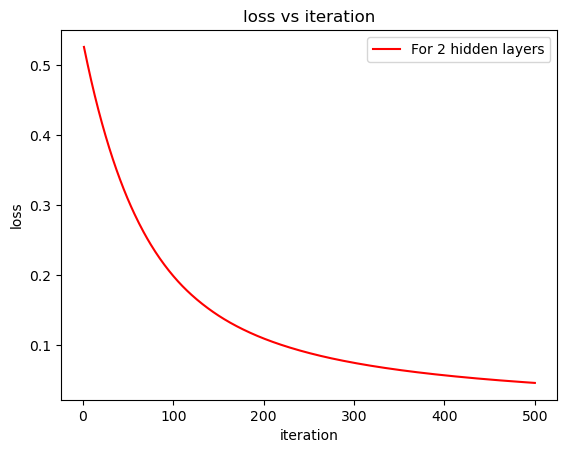

In [12]:
n_iteration1 = len(err)  # array of costs at each iteration
n_iteration1 = list(range(1, n_iteration1+1))

plt.plot(n_iteration1, err, color = 'red', label = 'For 2 hidden layers')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss vs iteration')
plt.legend(loc = 'upper right')
plt.show()


# Checking the Error for train, test and validation set


In [13]:
print(f'The training error is: {err[len(err)-1]}')
validation_error1 = calculate_error(X_val, y_val, n_layer, f_list, list_w, list_b)
print(f'The validation error is: {validation_error1}')

test_error1 = calculate_error(X_test, y_test, n_layer, f_list, list_w, list_b)
print(f'The test error is: {test_error1}')

The training error is: 0.04572018726230093
The validation error is: 0.04322271243058661
The test error is: 0.05040479083046893


# Checking the accuracy for train, test and validation set


In [14]:
y_train_pred = prediction(y_train, X_train, n_layer, f_list, list_w, list_b)
labeled_y_train = find_label(y_train_pred)
train_accuracy1 = accu(y_train, labeled_y_train)
print(f'The train accuracy is: {train_accuracy1}')

y_val_pred = prediction(y_val, X_val, n_layer, f_list, list_w, list_b)
labeled_y_val = find_label(y_val_pred)
validation_accuracy1 = accu(y_val, labeled_y_val)
print(f'The validation accuracy is: {validation_accuracy1}')

y_test_pred = prediction(y_test, X_test, n_layer, f_list, list_w, list_b)
labeled_y_test = find_label(y_test_pred)
test_accuracy1 = accu(y_test, labeled_y_test)
print(f'The test accuracy is: {test_accuracy1}')


The train accuracy is: 1.0
The validation accuracy is: 1.0
The test accuracy is: 1.0


# Calculating the evaluation metrices for 2 hidden layers


In [15]:
print('-----------------:The evaluation metric for train set:-----------------------')
evaluation_metric(y_train, labeled_y_train)

print('-----------------:The evaluation metric for validation set:-----------------------')
evaluation_metric(y_val, labeled_y_val)

print('-----------------:The evaluation metric for test set:-----------------------')
evaluation_metric(y_test, labeled_y_test)


-----------------:The evaluation metric for train set:-----------------------
True positive: 181, True negetive: 169, False positive: 0, False negetive: 0
The precision is: 0.9999999944751382
The recall is: 0.9999999944751382
The f1 score is: 0.9999994944753883
The accuracy is: 1.0
-----------------:The evaluation metric for validation set:-----------------------
True positive: 39, True negetive: 36, False positive: 0, False negetive: 0
The precision is: 0.999999974358975
The recall is: 0.999999974358975
The f1 score is: 0.9999994743592251
The accuracy is: 1.0
-----------------:The evaluation metric for test set:-----------------------
True positive: 30, True negetive: 45, False positive: 0, False negetive: 0
The precision is: 0.9999999666666678
The recall is: 0.9999999666666678
The f1 score is: 0.9999994666669179
The accuracy is: 1.0


# Test the code for n=3 and n=4 hidden layers

In [16]:
# Define layer sizes for each case
layer_sizes_2 = [5, 1]  # For 2 hidden layers
layer_sizes_3 = [5, 3, 1]  # For 3 hidden layers
layer_sizes_4 = [5, 3, 2, 1]  # For 4 hidden layers

# Define activation functions for each case
f_list_2 = [Relu, sigmoid]  # For 2 hidden layers
f_list_3 = [Relu, Relu, sigmoid]  # For 3 hidden layers
f_list_4 = [Relu, Relu, Relu, sigmoid]  # For 4 hidden layers

# Initialize parameters for each case
w_list_2, b_list_2 = parameter_initialization(X_train[0], layer_sizes_2)
w_list_3, b_list_3 = parameter_initialization(X_train[0], layer_sizes_3)
w_list_4, b_list_4 = parameter_initialization(X_train[0], layer_sizes_4)

# Train the neural network for each case
err_2, _, _ = Gradient_descent(X_train, y_train, len(layer_sizes_2), f_list_2, w_list_2, b_list_2, learning_rate=0.01, nEpoch=500)
err_3, _, _ = Gradient_descent(X_train, y_train, len(layer_sizes_3), f_list_3, w_list_3, b_list_3, learning_rate=0.01, nEpoch=500)
err_4, _, _ = Gradient_descent(X_train, y_train, len(layer_sizes_4), f_list_4, w_list_4, b_list_4, learning_rate=0.01, nEpoch=500)



The error in 0 -th iteration is: 0.5265326251603307
The error in 1 -th iteration is: 0.5202399086621526
The error in 2 -th iteration is: 0.5140325046066784
The error in 3 -th iteration is: 0.5079277085819672
The error in 4 -th iteration is: 0.5019167994027594
The error in 5 -th iteration is: 0.4959822620671135
The error in 6 -th iteration is: 0.49014446963645925
The error in 7 -th iteration is: 0.4843703430085001
The error in 8 -th iteration is: 0.47867941820227145
The error in 9 -th iteration is: 0.473083111112161
The error in 10 -th iteration is: 0.46757967686165414
The error in 11 -th iteration is: 0.4621673953603621
The error in 12 -th iteration is: 0.4568445717674694
The error in 13 -th iteration is: 0.45160953688075445
The error in 14 -th iteration is: 0.4464606474555567
The error in 15 -th iteration is: 0.4413962864579648
The error in 16 -th iteration is: 0.43641486325645684
The error in 17 -th iteration is: 0.431505861104915
The error in 18 -th iteration is: 0.42666608340880097

# Calculating the evaluation metrices for n=3 and n=4 hidden layers

In [17]:
# Obtain predictions for validation or test set for 3 hidden layers
y_pred_val_3 = prediction(y_val, X_val, len(layer_sizes_3), f_list_3, w_list_3, b_list_3)
y_pred_label_val_3 = find_label(y_pred_val_3)

# Obtain predictions for validation or test set for 4 hidden layers
y_pred_val_4 = prediction(y_val, X_val, len(layer_sizes_4), f_list_4, w_list_4, b_list_4)
y_pred_label_val_4 = find_label(y_pred_val_4)

# Calculate evaluation metrics for 3 hidden layers
print("Evaluation Metrics for 3 Hidden Layers:")
evaluation_metric(y_val, y_pred_label_val_3)

# Calculate evaluation metrics for 4 hidden layers
print("\nEvaluation Metrics for 4 Hidden Layers:")
evaluation_metric(y_val, y_pred_label_val_4)


Evaluation Metrics for 3 Hidden Layers:
True positive: 39, True negetive: 36, False positive: 0, False negetive: 0
The precision is: 0.999999974358975
The recall is: 0.999999974358975
The f1 score is: 0.9999994743592251
The accuracy is: 1.0

Evaluation Metrics for 4 Hidden Layers:
True positive: 39, True negetive: 0, False positive: 36, False negetive: 0
The precision is: 0.5199999930666668
The recall is: 0.999999974358975
The f1 score is: 0.6842100641738866
The accuracy is: 0.52


# Plotting the loss function for different  hidden Layers

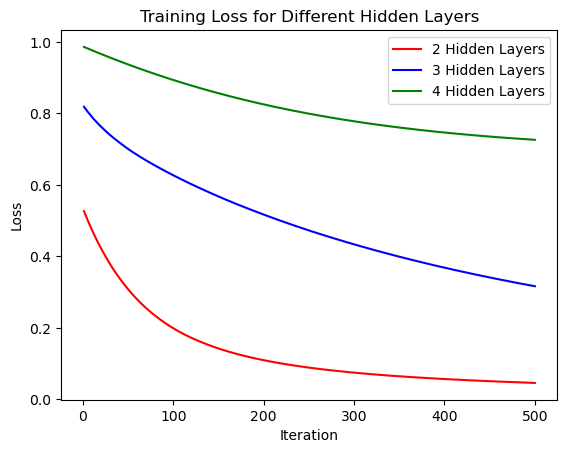

In [18]:
# Plot all three training loss curves together
n_iteration_2 = len(err_2)
n_iteration_2 = list(range(1, n_iteration_2 + 1))

n_iteration_3 = len(err_3)
n_iteration_3 = list(range(1, n_iteration_3 + 1))

n_iteration_4 = len(err_4)
n_iteration_4 = list(range(1, n_iteration_4 + 1))

plt.plot(n_iteration_2, err_2, color='red', label='2 Hidden Layers')
plt.plot(n_iteration_3, err_3, color='blue', label='3 Hidden Layers')
plt.plot(n_iteration_4, err_4, color='green', label='4 Hidden Layers')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss for Different Hidden Layers')
plt.legend()
plt.show()
